# Atividade 1 - SIN5016 Aprendizado de máquina

Ministrada pelo prof. Clodoaldo A. M. Lima

Autor do notebook: Bruno Kemmer

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regressão Linear

In [327]:
def regressao_linear(X, y):
    """ Cálculo da regressão linear na forma vetorial sem regularização

    Arguments:
        X {Matriz} -- Matriz dos exemplos de entrada já com a coluna com x_0 = 1 adicionada 
        y {Vetor} --  Vetor da classe de saída 

    Returns:
        [W] -- Matriz de pesos 
    """
    return np.dot(np.dot(np.linalg.inv((np.dot(np.transpose(X), X))), np.transpose(X)), y)

def preditor_linear(w, X):
    """ Preditor da função linear estimada

    Arguments:
        w {Vetor} -- Vetor de pesos
        x {Vetor} -- Vetor com os atributos do exemplo em questão

    Returns:
        classe -- classe estimada
    """
    return np.sign(np.sum(w*X, axis=1))

def funcao_erro(y_hat, y):
    """ Função de erro"""
    return np.sign(y_hat - y)

## Dataset:  Iris Data Set 

[fonte](https://archive.ics.uci.edu/ml/datasets/Iris?spm=a2c4e.11153940.blogcont603256.5.333b1d6f05ZggC)

Atributos:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

In [328]:
def obter_dataset(input_path='./data/iris.data', 
                  dict_str=d
                 ):
    X = np.loadtxt(input_path, delimiter=',', dtype=np.float, usecols=(0,1,2,3))
    X = np.concatenate((np.ones((len(X),1)), X), axis=1)
    y = np.loadtxt(input_path, delimiter=',', dtype=None, usecols=(4), encoding='UTF', converters={4:dict_str.get})
    return X, y

In [329]:
input_path='./data/iris.data'
d={"Iris-setosa":[1,-1,-1], "Iris-versicolor":[-1,1,-1],"Iris-virginica":[-1,-1,1]}
X, y = obter_dataset(input_path, d)
print(X[0:5, :])
print(y[0:5])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]]
[[ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]
 [ 1. -1. -1.]]


In [330]:
# input_path='./data/iris.data'
# d_tmp={"Iris-setosa":1, "Iris-versicolor":-1,"Iris-virginica":-1}
# X, y = obter_dataset(input_path, d_tmp)
# print(X[0:5, :])
# print(y[0:5])

In [331]:
np.unique(y, return_counts=True)

(array([-1.,  1.]), array([300, 150]))

# Análise exploratória

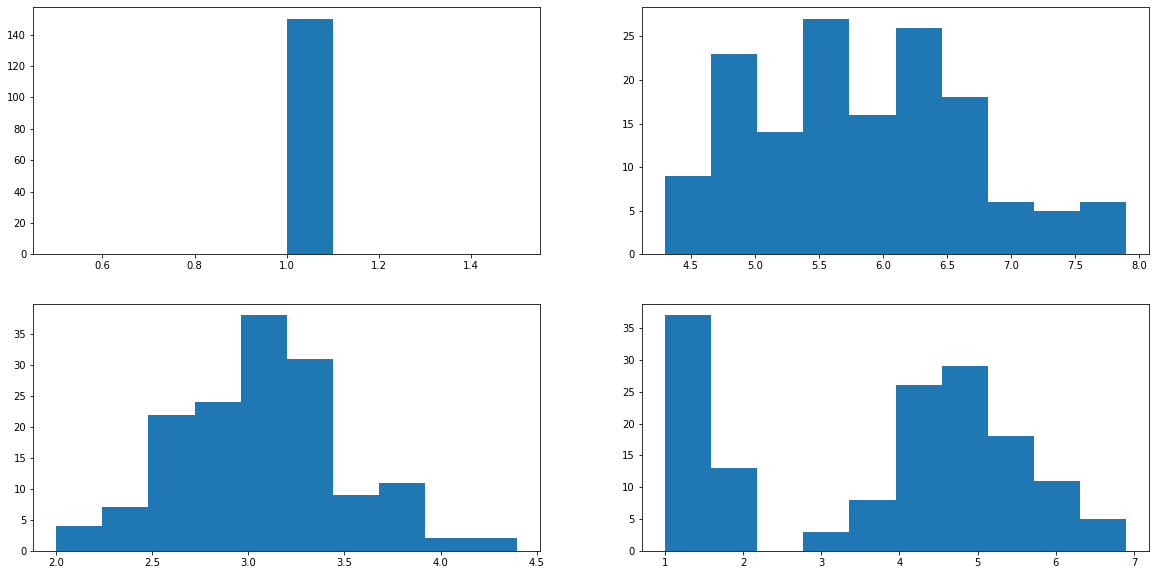

In [332]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
axs = np.reshape(axs, -1)
for i in range(0,4):
    axs[i].hist(X[:,i])

#### Executando a regressão linear sem normalizar o dataset

In [333]:
print('X: ', np.shape(X))
print('y: ', np.shape(y))

X:  (150, 5)
y:  (150, 3)


In [334]:
w = regressao_linear(X, y)
print('w: ', np.shape(w))
w

w:  (5, 3)


array([[-0.75506092,  2.12595385, -2.37089293],
       [ 0.1312861 , -0.04308928, -0.08819682],
       [ 0.48494601, -0.88141112,  0.39646511],
       [-0.44552275,  0.43704274,  0.00848001],
       [-0.12670283, -0.96638259,  1.09308541]])

In [335]:
X[0]

array([1. , 5.1, 3.5, 1.4, 0.2])

In [336]:
y_hat = np.sign(np.sum(w[:,0]*X, axis=1))
y_hat

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [337]:
np.sum((y_hat > 0)) 

50

In [325]:
y

array([[-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.,  1.],
       [-1., -1.

In [297]:
y_hat = preditor_linear(w, X)
print("y_hat: ", len(y_hat))
y_hat[0:5]

ValueError: operands could not be broadcast together with shapes (5,3) (150,5) 

In [298]:
# np.sum(y_hat - y)

In [287]:
y_hat

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

In [288]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1.])

## Dataset: Pima Indians Diabetes Database
[fonte](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
### Descrição:
O dataset consiste em diferentes variáveis preditoras médicas (independentes) e uma variável classe (dependente).
As variávies independentes incluem: número de gravidezes que o paciente teve, seu BMI, nível de insulina, idade entre outros.

### Atributos:

1. Pregnancies - Gravidezes - número de vezes em que a pessoa já engravidou
2. Glucose - Nível de glicose - concentração de de glicose no plasma em 2 horas em um teste de tolerância oral.
3. BloodPressure - Diastolic blood pressure (mm Hg) - Pressão sanguínea diastólica
4. SkinThickness - Triceps skin fold thickness (mm) - Grossura da pele via o quanto é possível dobrar do triceps
7. Insulin - Nível de insulina 2-Hour serum insulin (mu U/ml) - 
8. BMI - Body mass index - Índice de massa corporal
9. Age - Idade
10. Outcome - Variável classe (0 ou 1) - 268 de 768 exemplos são da classe 1, os outros são 0.


## Dataset: Hepatitis Data Set

[fonte](https://archive.ics.uci.edu/ml/datasets/Hepatitis)

- Número de instâncias: 155
- Tem valores faltantes: Sim
- Número de atributos: 19

## Atributos

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes